## Statistical analysis for crime data

### Navigation
* [README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md)
* [Clean data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/cleaned_data.csv)
* [Raw data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/raw_data.csv)
* [ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb)
* [Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb)

##### Import libralies and load dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../dataset/cleaned_data.csv')
df.head()

,Date,Measure,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Refresh Date,Year,Month,Weekday
0,2023-06-01,Business Crime Outcomes,Barking and Dagenham,POSSESSION OF WEAPONS,POSSESSION OF WEAPONS,Investigation Complete; No Suspect Identified....,N,1,2025-06-05,2023,6,Thursday
1,2023-06-01,Business Crime Outcomes,Barking and Dagenham,THEFT,OTHER THEFT,Investigation Complete; No Suspect Identified....,N,2,2025-06-05,2023,6,Thursday
2,2023-06-01,Business Crime Outcomes,Barking and Dagenham,THEFT,SHOPLIFTING,Named Suspect Identified: Victim Supports Poli...,N,2,2025-06-05,2023,6,Thursday
3,2023-06-01,Business Crime Outcomes,Barking and Dagenham,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Named Suspect Identified: Evidential Difficult...,N,2,2025-06-05,2023,6,Thursday
4,2023-06-01,Business Crime Outcomes,Barnet,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Named Suspect Identified: Victim Supports Poli...,N,1,2025-06-05,2023,6,Thursday


#### Mean crime count per borough

In [ ]:
df['Borough'].value_counts().mean()

np.float64(12347.5)

The mean is the sum of all values divided by the number of values and it is the average. The average number of crime in borough is 12347

#### Median crime count per borough

In [5]:
df['Crime Section'].value_counts().median()

np.float64(23347.0)

The Median is the middle value in a dataset. 

#### Standard Deviation

In [6]:
df['Outcome Count'].std()

np.float64(3.3720163769819123)

Standard deviation measures how spread out the data is. A high standard deviation means more variability.
This data has standard deviation of 3.37 which is moderately spread out. 

#### Hypothesis Testing
Hypothesis testing helps assess if differences or relationships are statistically significant, not just due to chance.

First, install scripy

In [18]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
from scipy.stats import ttest_ind
import itertools

# Map 'Y'/'N' to 1/0
df['Closed'] = df['Positive Outcome'].map({'Y': 1, 'N': 0})

# Get top 10 boroughs by crime count
top_boroughs = df['Borough'].value_counts().nlargest(10).index

# Filter dataframe to include only those boroughs
filtered_df = df[df['Borough'].isin(top_boroughs)]

# Loop through all unique borough pairs
for b1, b2 in itertools.combinations(top_boroughs, 2):
    group1 = filtered_df[filtered_df['Borough'] == b1]['Closed']
    group2 = filtered_df[filtered_df['Borough'] == b2]['Closed']
    
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    
    print(f"{b1} vs {b2} -> t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

Westminster vs Camden -> t-statistic: 15.37, p-value: 0.0000
Westminster vs Tower Hamlets -> t-statistic: 14.79, p-value: 0.0000
Westminster vs Newham -> t-statistic: 9.63, p-value: 0.0000
Westminster vs Lambeth -> t-statistic: 12.62, p-value: 0.0000
Westminster vs Southwark -> t-statistic: 15.98, p-value: 0.0000
Westminster vs Hackney -> t-statistic: 15.69, p-value: 0.0000
Westminster vs Brent -> t-statistic: 14.70, p-value: 0.0000
Westminster vs Islington -> t-statistic: 13.48, p-value: 0.0000
Westminster vs Hillingdon -> t-statistic: 9.93, p-value: 0.0000
Camden vs Tower Hamlets -> t-statistic: -0.43, p-value: 0.6685
Camden vs Newham -> t-statistic: -5.27, p-value: 0.0000
Camden vs Lambeth -> t-statistic: -2.38, p-value: 0.0174
Camden vs Southwark -> t-statistic: 0.88, p-value: 0.3798
Camden vs Hackney -> t-statistic: 0.84, p-value: 0.3996
Camden vs Brent -> t-statistic: 0.01, p-value: 0.9954
Camden vs Islington -> t-statistic: -1.16, p-value: 0.2450
Camden vs Hillingdon -> t-statis

Top 3 statistically significant borough based on this comparison are
| Boroughs                  | t-statistic | p-value | 
| ---------------------------- | ----------- | ------- |
| **Westminster vs Southwark** | 15.98       | 0.0000  |
| **Westminster vs Hackney**   | 15.69       | 0.0000  |
| **Westminster vs Camden**    | 15.37       | 0.0000  |


All three involve Westminster, suggesting its closure rate is significantly higher (or lower) than others.
All p-values are < 0.001, meaning the differences are very unlikely due to chance.

All the comparison to Westminster shows 0.000 p-value so I will double check if this is an error.

In [20]:
# checking for positive outcome rate
df.groupby('Borough')['Closed'].mean().sort_values(ascending=False)


Borough
Westminster               0.176172
Havering                  0.142871
Bromley                   0.139373
Newham                    0.139195
Hillingdon                0.136591
Hammersmith and Fulham    0.133753
Kingston upon Thames      0.131292
Lewisham                  0.130281
Bexley                    0.128637
Lambeth                   0.128212
Croydon                   0.127971
Greenwich                 0.127785
Barking and Dagenham      0.127094
Islington                 0.123790
Tower Hamlets             0.120990
Waltham Forest            0.120750
Haringey                  0.120286
Camden                    0.119441
Brent                     0.119420
Hackney                   0.116355
Southwark                 0.116266
Sutton                    0.116125
Redbridge                 0.113078
Wandsworth                0.110312
Kensington and Chelsea    0.108281
Hounslow                  0.107864
Barnet                    0.106624
Harrow                    0.102233
Ealing      

Westminster has the highest closure rate compared to other boroughs so the p-value isn't an error. 

This hypothesis testing can conclude Westminster is the most satistically significant borough in closing crime case.

### Linear regression

Here I will make lineaar regression model that will predict future crime count in borough of Westminster.

In [ ]:
# Firstly, install scikit-learn
pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 4.8 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.7 MB 3.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.7 MB 3.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.7 MB 3.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 1.6 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.7 MB 2.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 2.8 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.7 MB 2.8 MB/s eta 0:00:02
   ------------------------------- ----

In [23]:
# Convert Date to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Filter for Westminster only
westminster_df = df[df['Borough'] == 'Westminster']

# Group by month and count number of crimes
monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


C:\Users\Kaori\AppData\Local\Temp\ipykernel_13428\2771093295.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = westminster_df.resample('M', on='Date').size().reset_index(name='CrimeCount')


In [24]:
# Create numeric month index for regression (e.g., 0, 1, 2...)
monthly_crimes['MonthIndex'] = range(len(monthly_crimes))

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Features and target
X = monthly_crimes[['MonthIndex']]
y = monthly_crimes['CrimeCount']

# Fit model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Predict next 6 months
future_months = pd.DataFrame({'MonthIndex': range(len(monthly_crimes), len(monthly_crimes) + 6)})
future_preds = model.predict(future_months)

# Combine predictions with month index
future_months['PredictedCrimeCount'] = future_preds


C:\Users\Kaori\AppData\Local\Temp\ipykernel_13428\745490956.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_dates = pd.date_range(


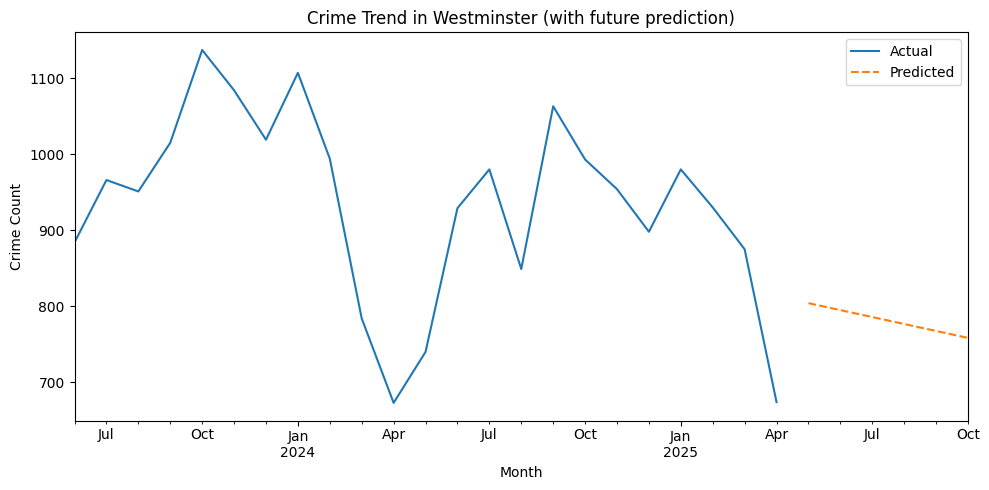

In [33]:
import matplotlib.pyplot as plt

# Extend the date range to cover future months
all_dates = pd.date_range(
    start=monthly_crimes['Date'].min(),
    periods=len(monthly_crimes) + 6,
    freq='M'
)

# Combine actual and predicted crime counts
all_crimes = pd.Series(
    list(monthly_crimes['CrimeCount']) + list(future_preds),
    index=all_dates
)

# Plot historical and future
plt.figure(figsize=(10, 5))
all_crimes[:len(monthly_crimes)].plot(label='Actual')
all_crimes[len(monthly_crimes):].plot(label='Predicted', linestyle='--')
plt.title('Crime Trend in Westminster (with future prediction)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.show()

Go back to \
[README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md) / 
[ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb) /
[Exploratory data analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/exploratory_data_analysis.ipynb)